In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import functools
import matplotlib.pyplot as plt
import numpy as np
import pvtrace
import os

import scintillator_tracing as st


ANGLE = 45

# Verification

In [3]:
nodes = st.worlds.build_chamfered_plate_world(ANGLE)
world = nodes['world']
crystal = nodes['crystal']

crystal_mid = (st.geometry_helpers.max_physical_value(crystal, 'z')+st.geometry_helpers.min_physical_value(crystal, 'z'))/2
light = st.definitions.generate_scintillated_light_node(world, 'light')
light.location = (0, 0, crystal_mid)

scene = pvtrace.Scene(world)
all_ray_steps = st.processing.process_photons_with_visual(scene, num_photons=100, seed=10, open_browser=True)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7079/static/


In [4]:
world = nodes['world']
world_nodes = st.processing.get_nodes_from_world(world).values()
print(world_nodes)
out = st.processing.organize_rays(all_ray_steps, world_nodes)
for key in out.keys():
    print(key, len(out[key]))
    print()

dict_values([Node(crystal), Node(optical pad), Node(sipm)])
absorb 100

exit 0

kill 0

reflect 0

crystal_absorbed 64

optical_pad_absorbed 0

sipm_absorbed 36



# Grid trials

In [5]:
nodes = st.worlds.build_chamfered_plate_world(ANGLE)
crystal = nodes['crystal']

zrange = (
    st.geometry_helpers.min_physical_value(crystal, 'z')+0.5,
    st.geometry_helpers.max_physical_value(crystal, 'z')-0.5,
)
yrange = (
    st.geometry_helpers.min_physical_value(crystal, 'y')+0.1,
    st.geometry_helpers.max_physical_value(crystal, 'y')-0.1,
)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7081/static/


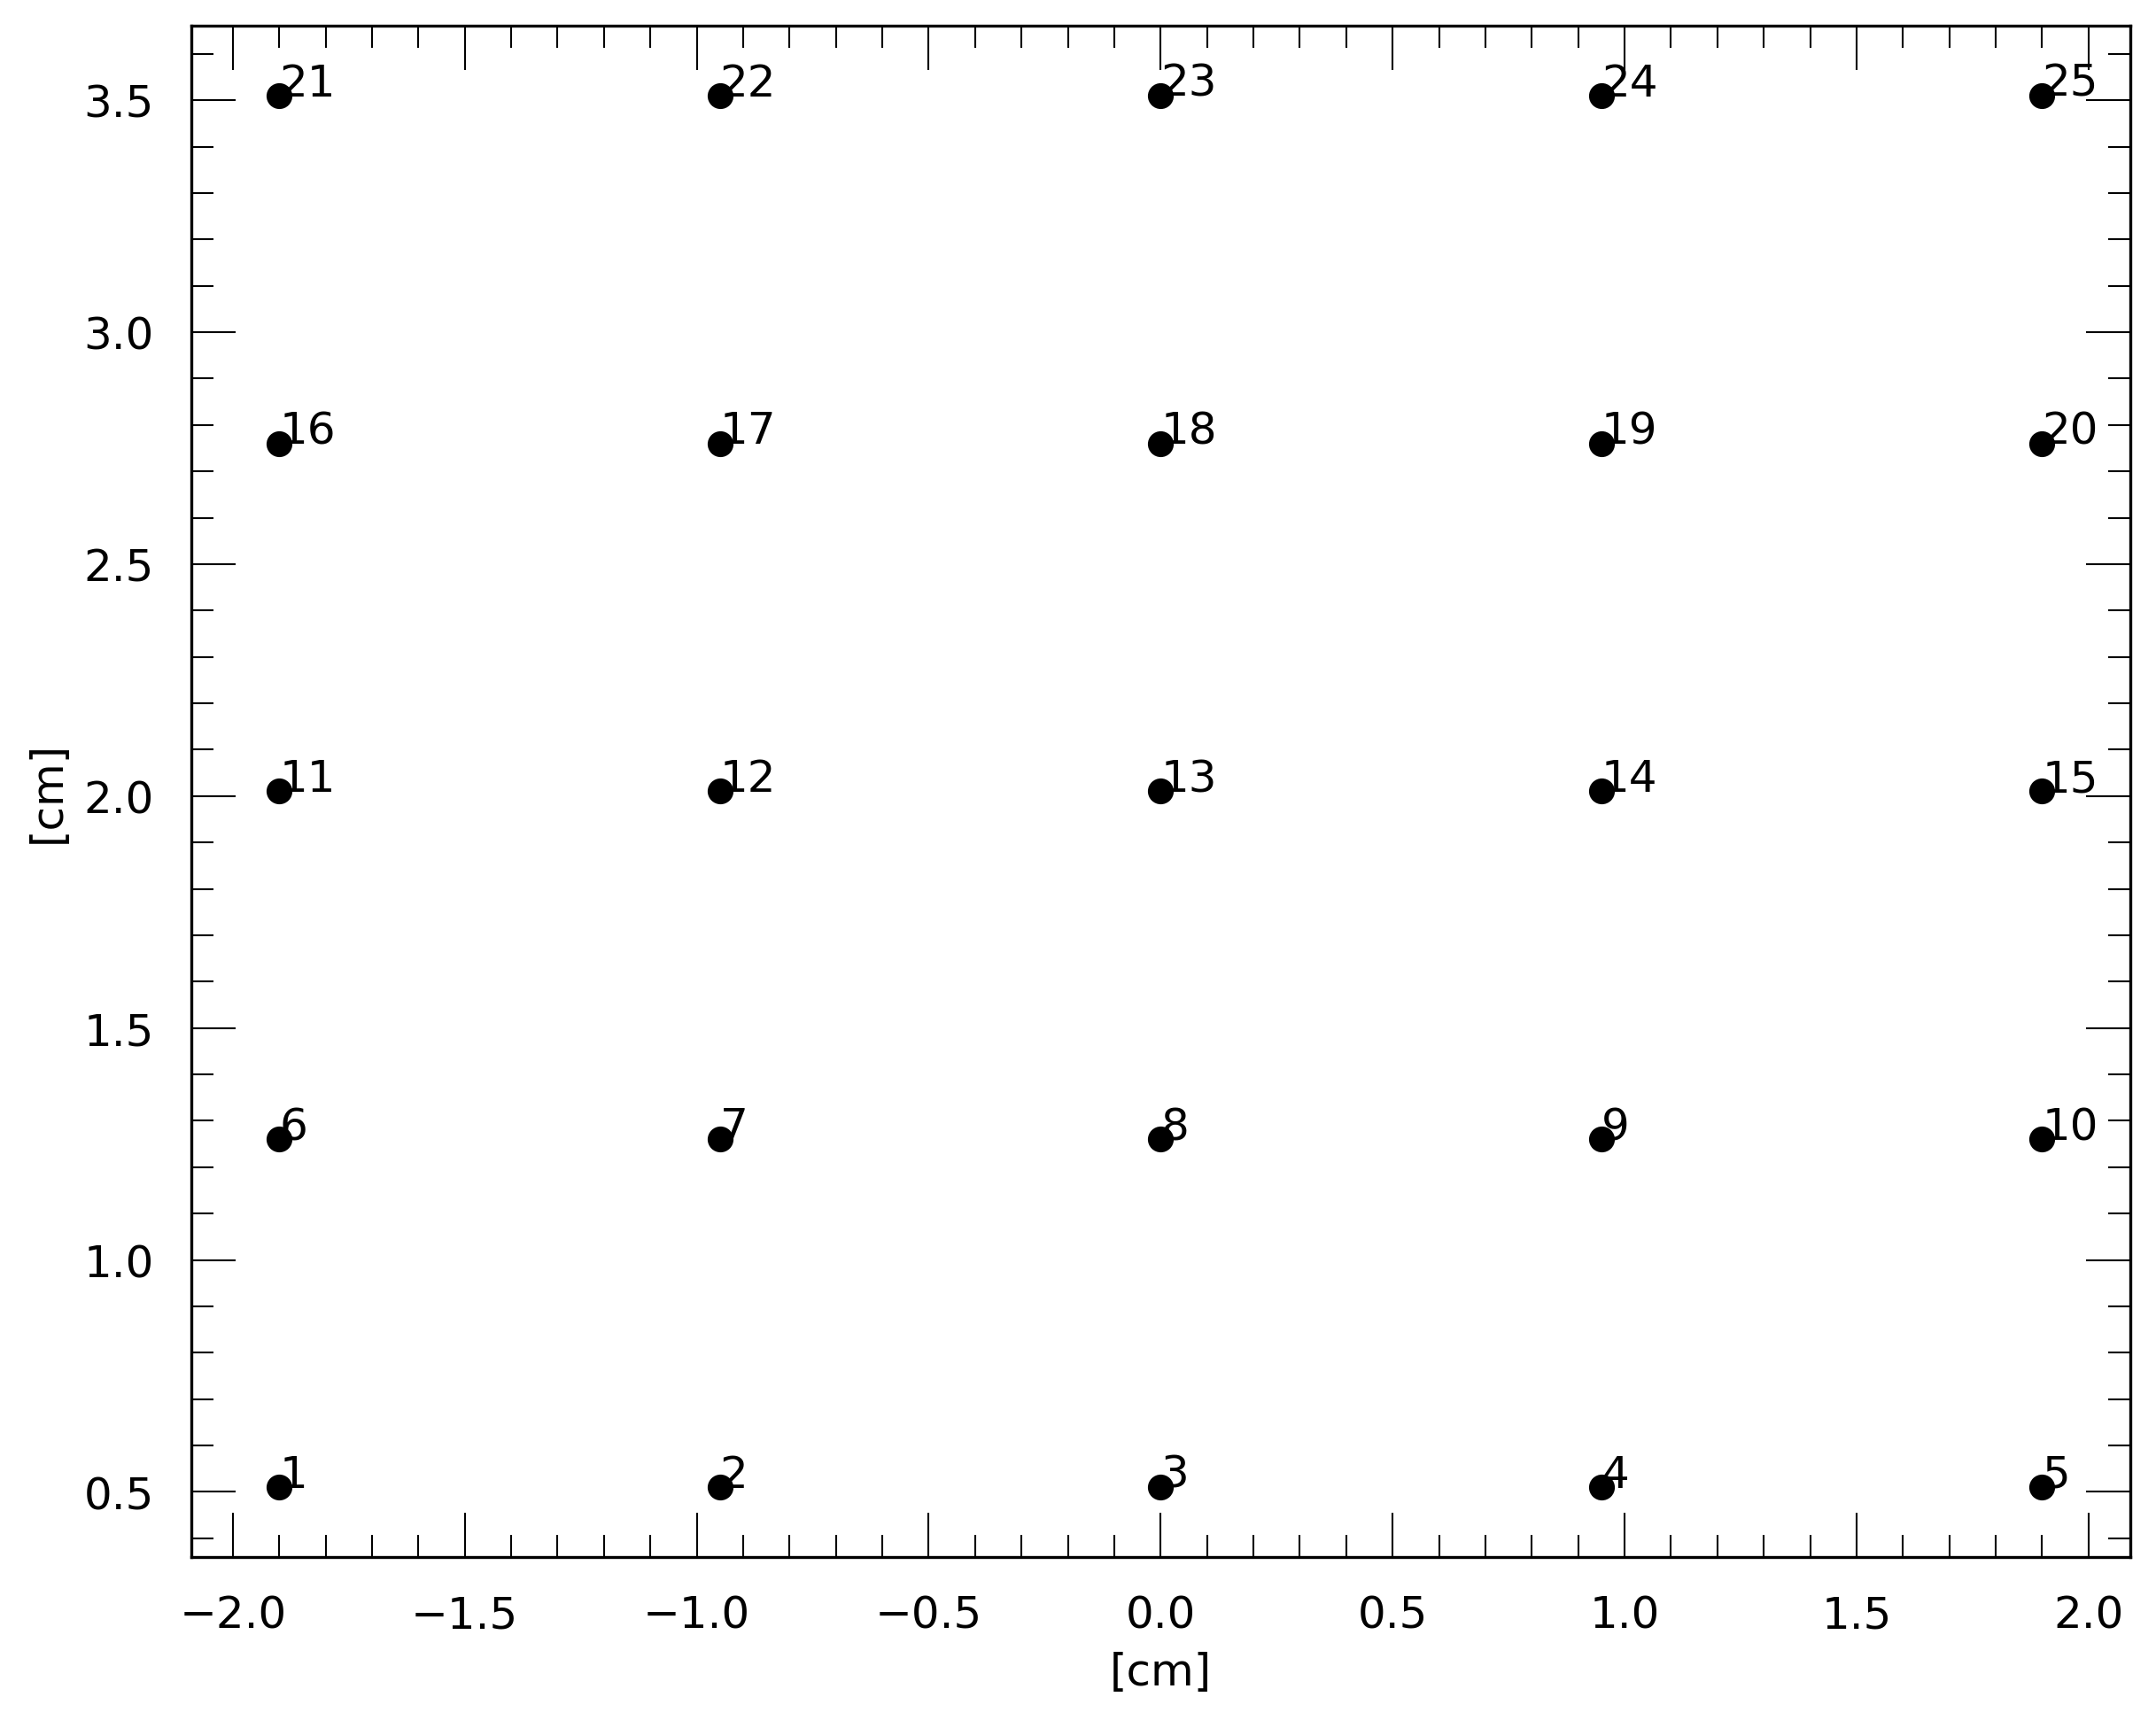

In [6]:
steps = 5
world_func = functools.partial(st.worlds.build_chamfered_plate_world, ANGLE)
man = st.processing.Manager(world_func, f'chamfered_plate_{ANGLE}deg')
man.define_grid(
    vertical_range=zrange,
    horizontal_func=lambda z: yrange,
    steps=steps,
    visualize=True
)

In [7]:
runs = man.run(200, seed=100, visualize=False)

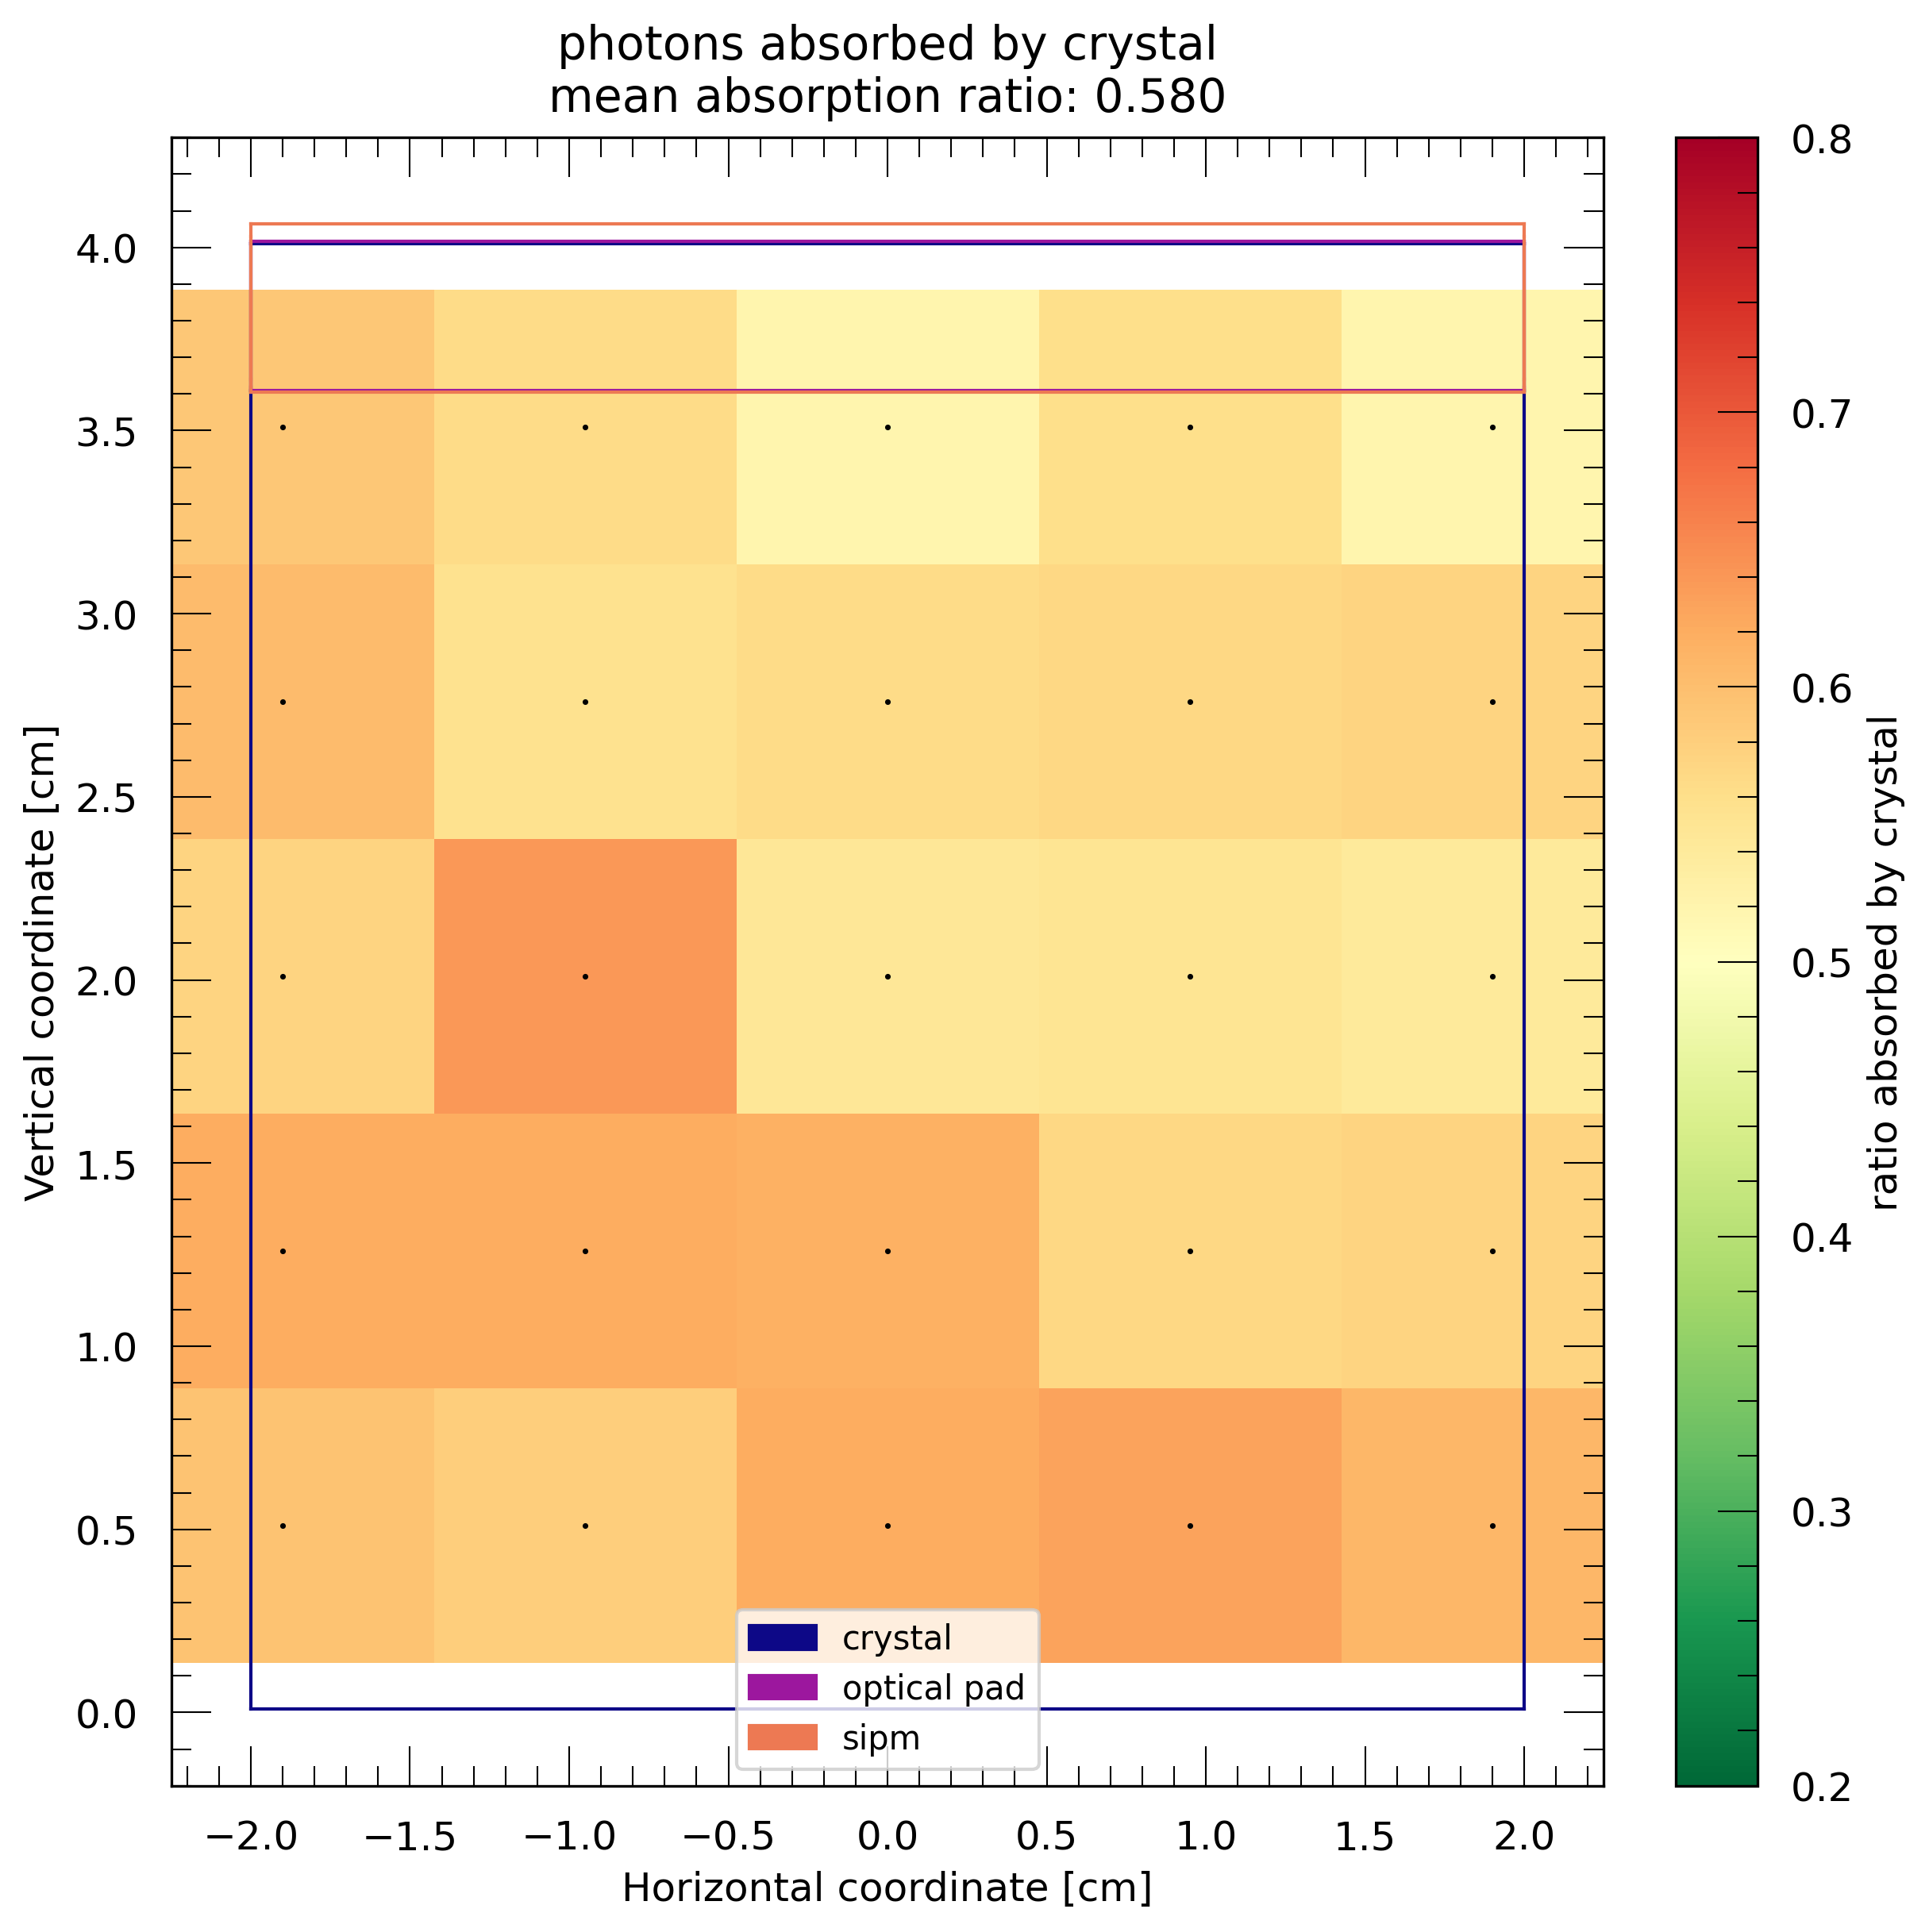

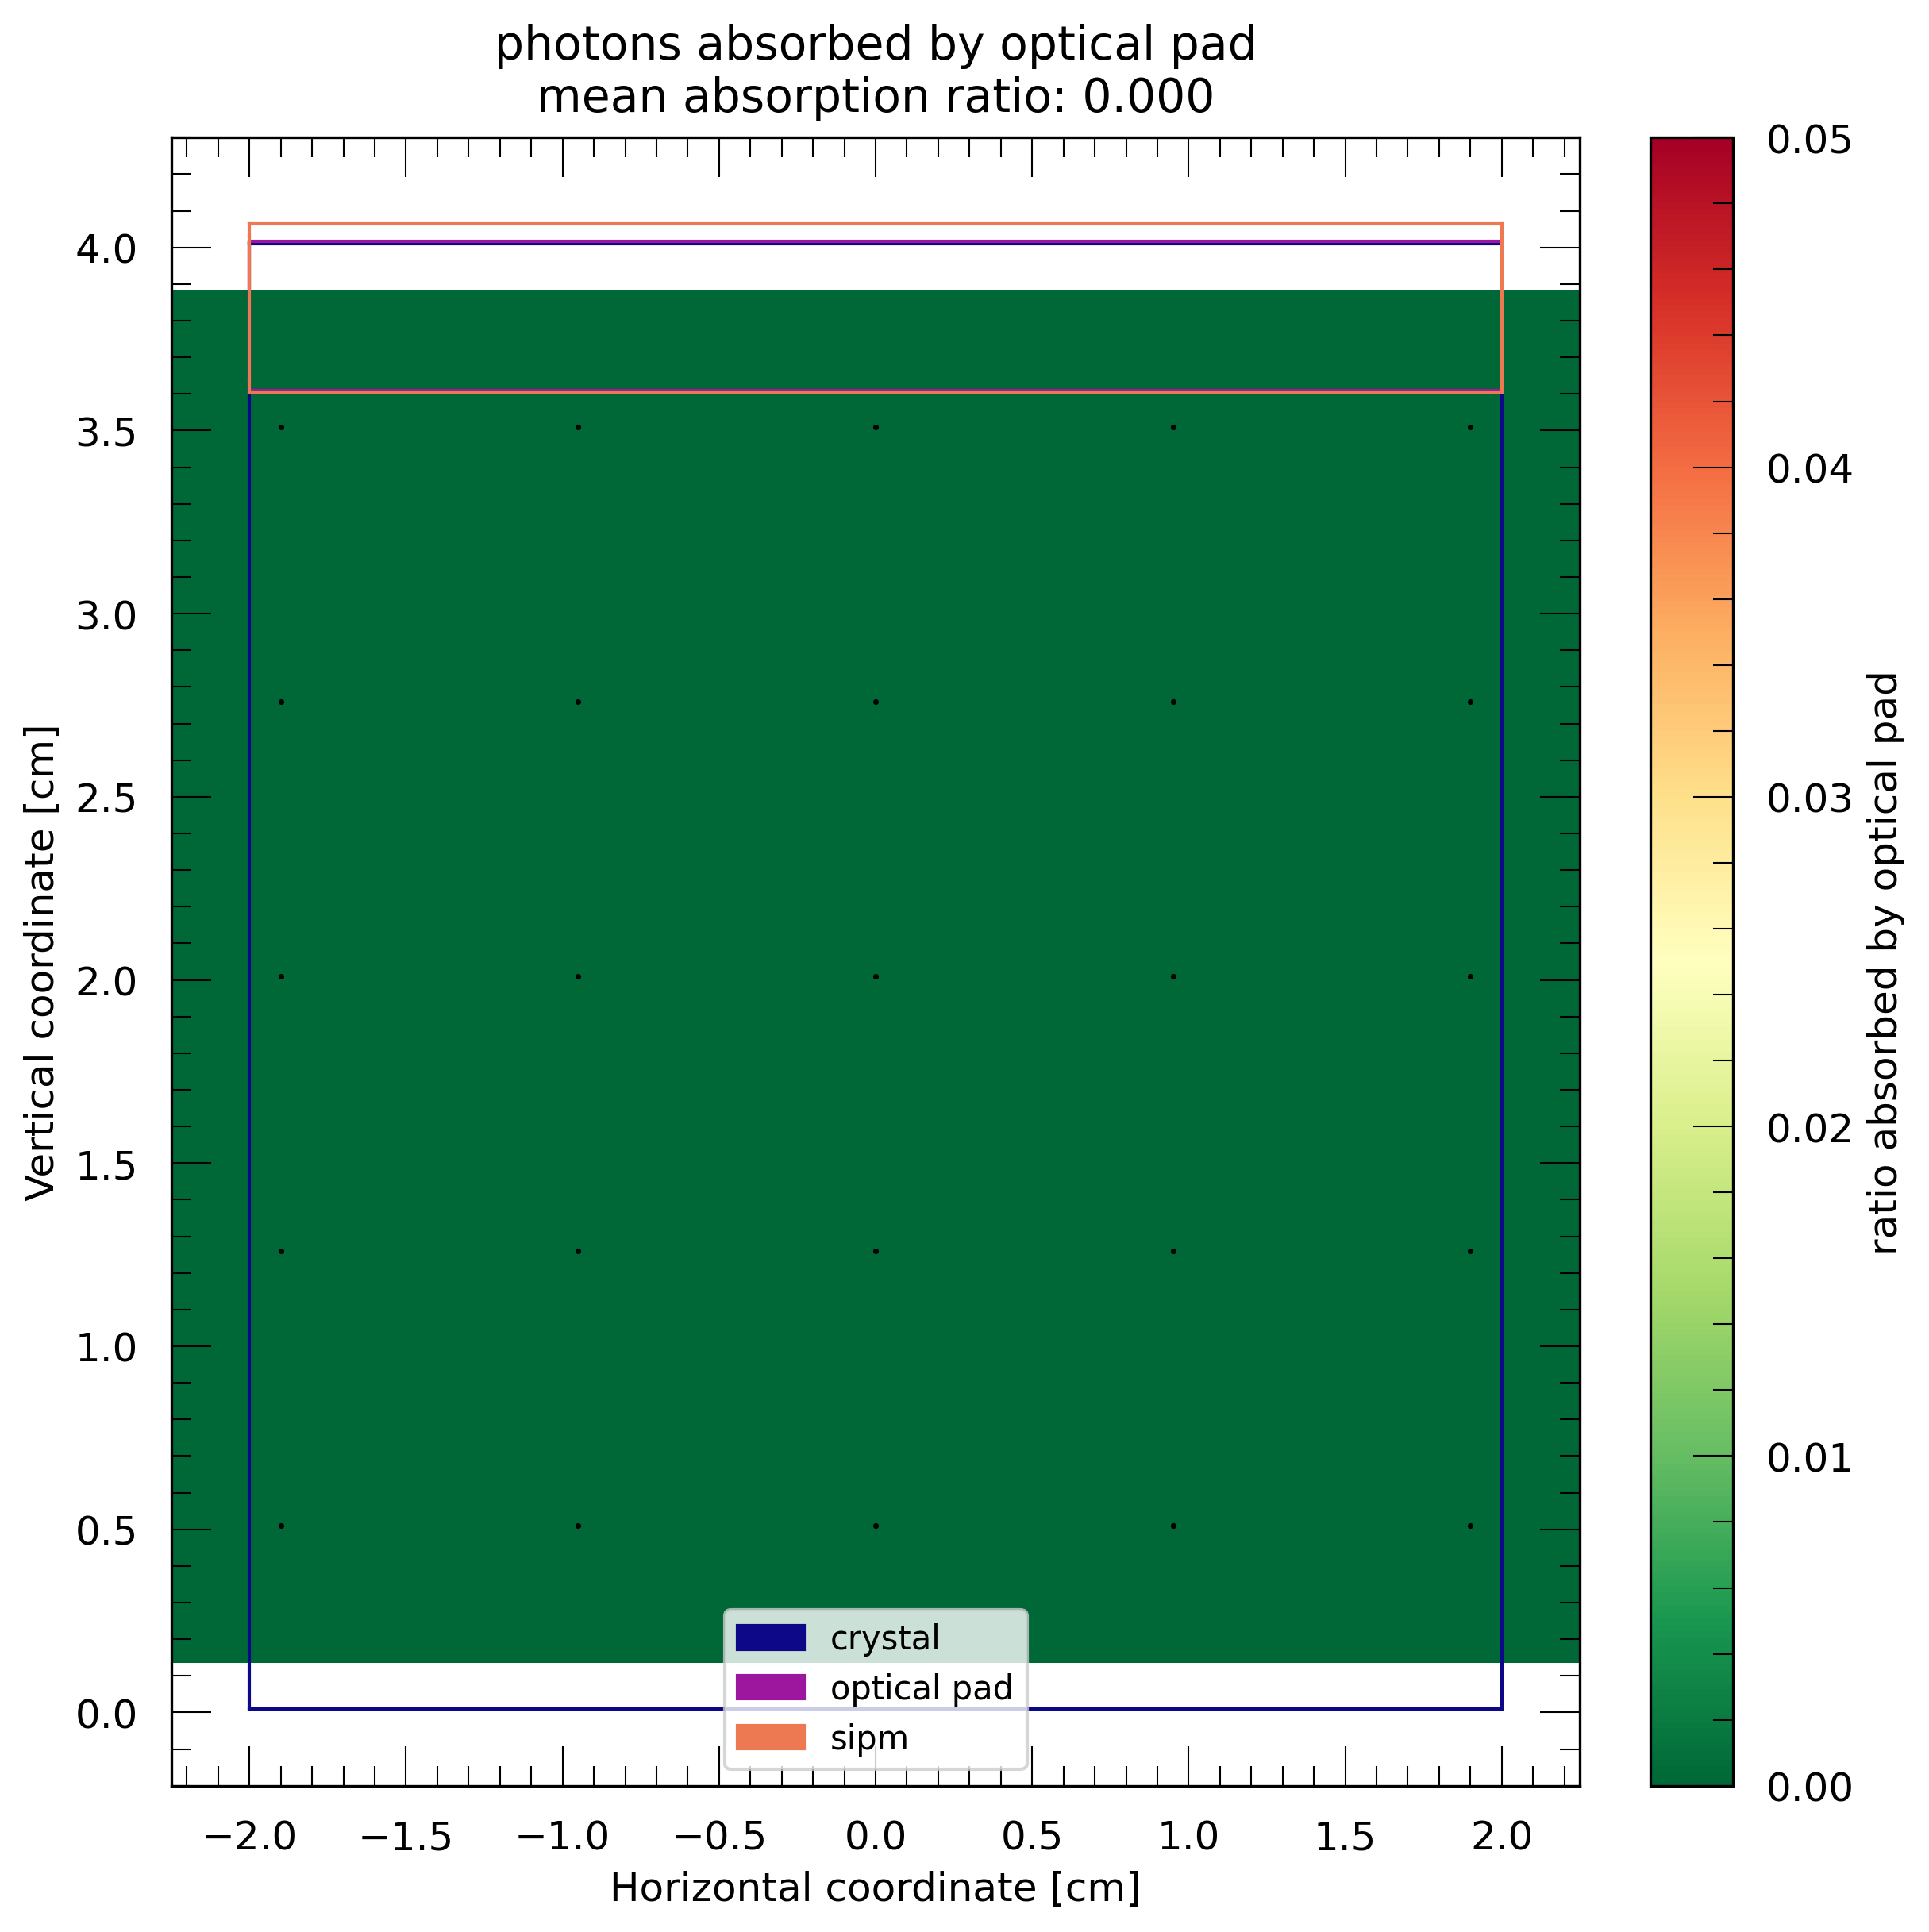

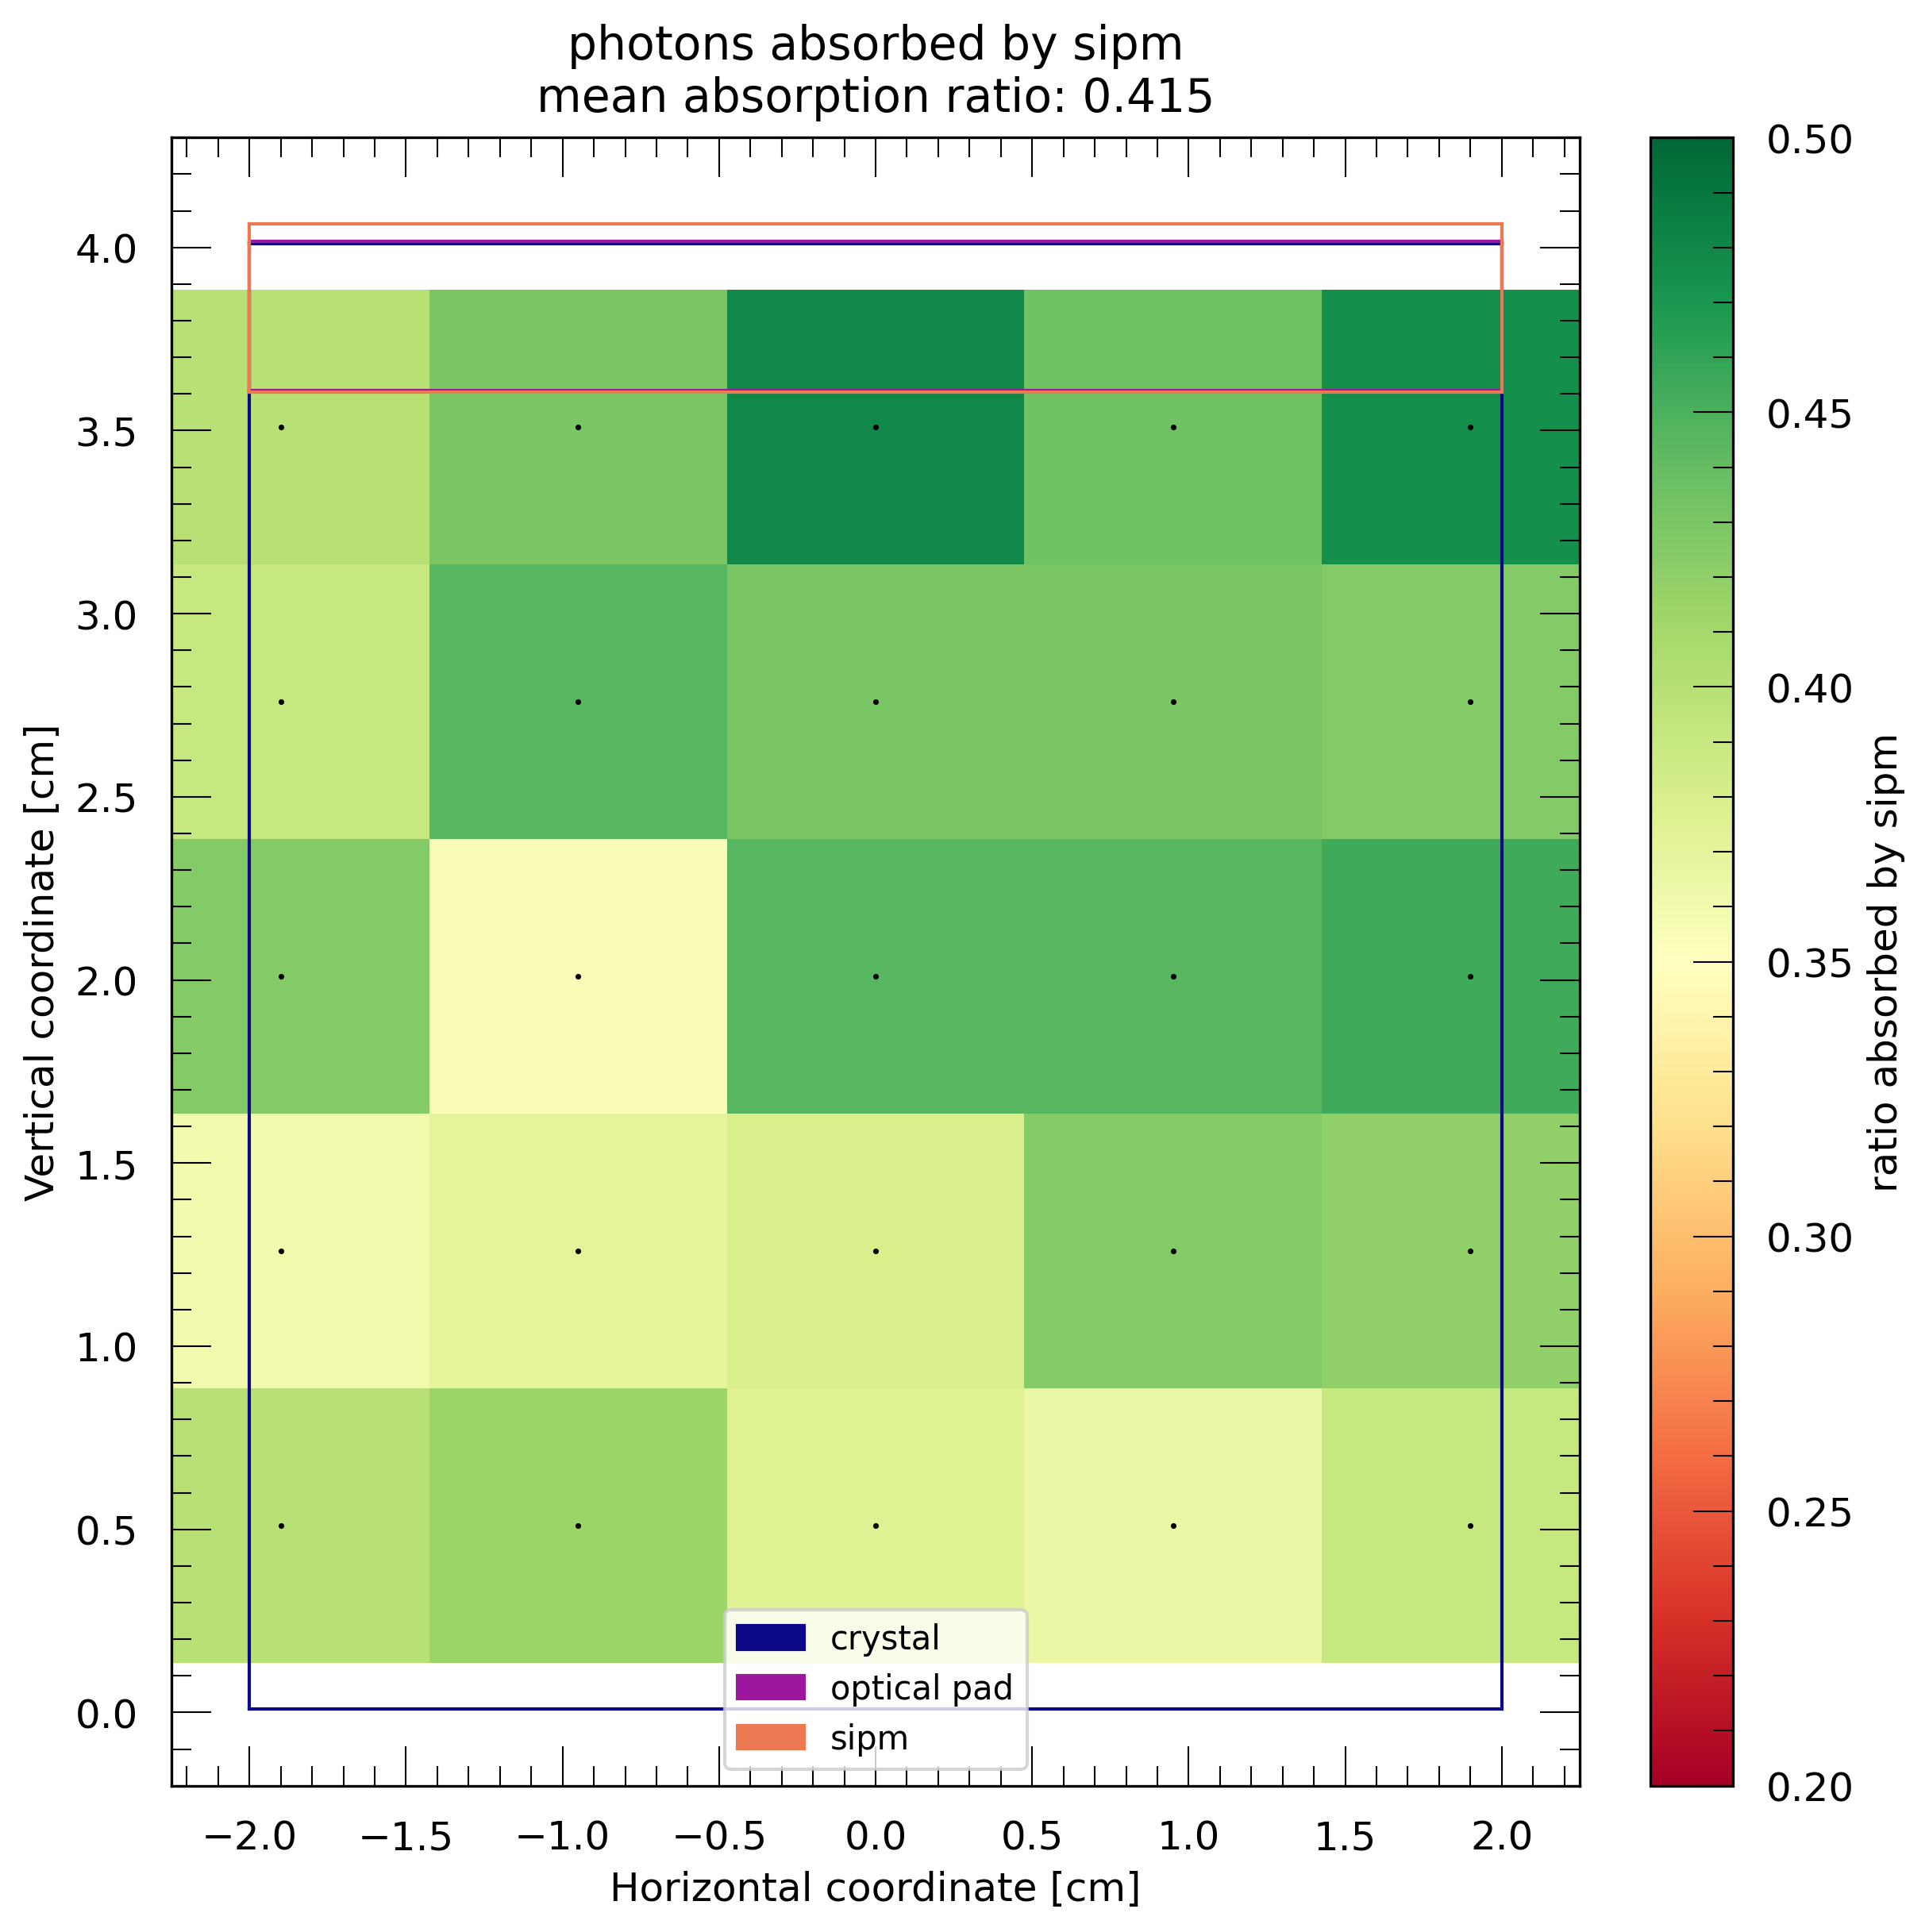

In [8]:
man.plot_all_ratios_absorbed()